#### Exploratory Analysis

In [1]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


In [2]:
# csv_file = '../data/citrus_dna_table.csv'
# organism_keyword = 'metagenome'
csv_file = '../data/sugarcane_dna_table.csv'
organism_keyword = 'metagenome'


In [3]:
df = pd.read_csv(csv_file,
                 header = 0,
                 low_memory=False)

In [4]:
df.shape

(5318, 147)

In [5]:
# Count values in 'lat_lon' column
lat_lon_counts = df['lat_lon'].value_counts()
df['lat_lon'].isna().sum()

# Count the uniques BioProjects
unique_bioprojects = df['BioProject'].nunique()
print(f'Info for Latitude/Longitude: {df.shape[0] - df['lat_lon'].isna().sum()} missing values, {lat_lon_counts.shape[0]} unique values')
print(f'Unique BioProjects: {unique_bioprojects}')

# # Count the unique PMIDs
# unique_pmids = df['PMIDs'].nunique()
# print(f'Unique PMIDs: {unique_pmids}')

# total_once_per_pmid = (
#     df.loc[df['PMIDs'].notna()]
#       .groupby('PMIDs', as_index=False)['PMID_count']
#       .max()['PMID_count'].sum()
# )
# print(f"Total PMID_count for once per unique PMIDs: {total_once_per_pmid}")

Info for Latitude/Longitude: 4013 missing values, 198 unique values
Unique BioProjects: 463


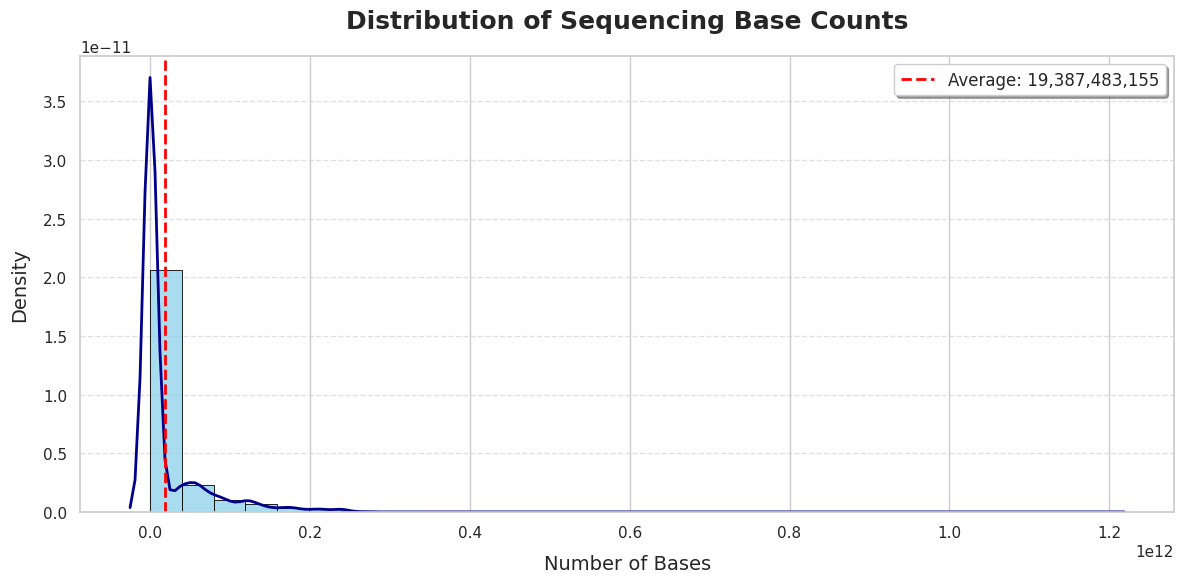

In [6]:
# BASES LENGTH
# Set style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

# Histogram normalized to density
sns.histplot(df['Bases'], bins=30, stat="density", 
             color="skyblue", edgecolor="black", linewidth=0.6, alpha=0.7)

# KDE curve
sns.kdeplot(df['Bases'], color="darkblue", linewidth=2)

# Average line
average_bases = df['Bases'].mean()
plt.axvline(average_bases, color='red', linestyle='--', linewidth=2, 
            label=f'Average: {average_bases:,.0f}')

# Titles and labels
plt.title('Distribution of Sequencing Base Counts', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of Bases', fontsize=14, labelpad=10)
plt.ylabel('Density', fontsize=14, labelpad=10)

# Format x-axis in scientific notation
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))

# Style ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add grid only on y-axis
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Legend
plt.legend(fontsize=12, frameon=True, shadow=True, loc="upper right")

plt.tight_layout()
plt.show()



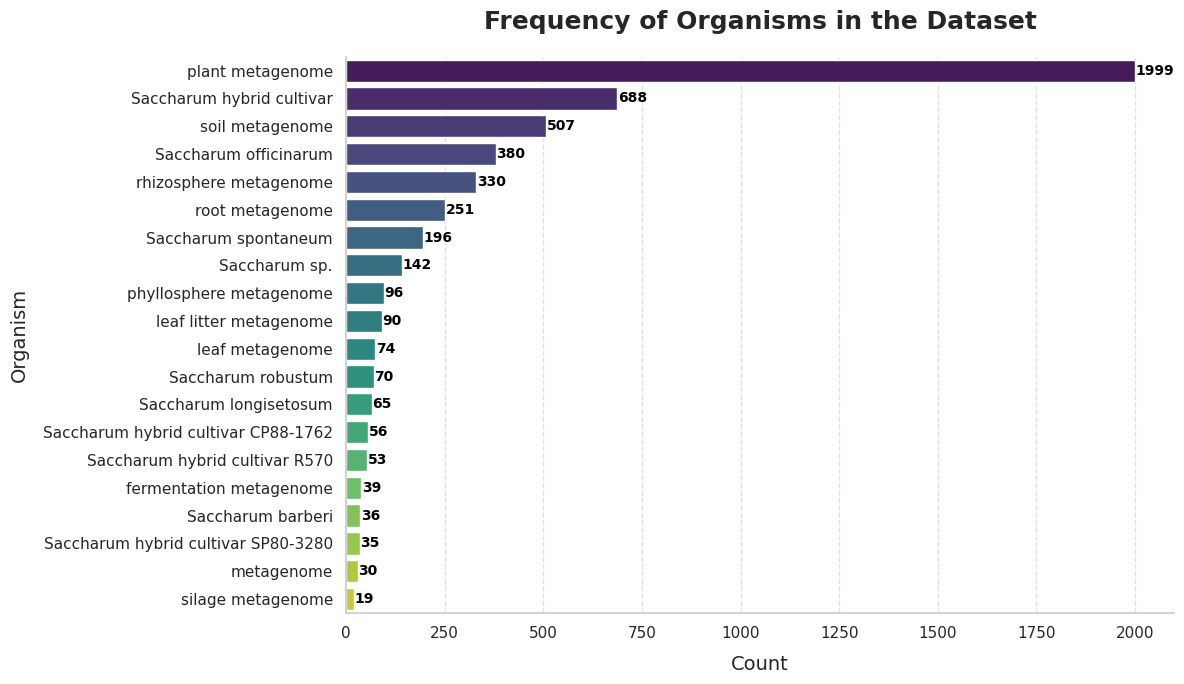

In [7]:
# Set style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))

# Order top 20 organisms
top_organisms = df['Organism'].value_counts().index[:20]

# Count plot with gradient palette
ax = sns.countplot(
    data=df, 
    y='Organism', 
    order=top_organisms, 
    palette=sns.color_palette("viridis", n_colors=20)
)

# Add value labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2, 
            f'{int(width)}', 
            va='center', fontsize=10, fontweight='bold', color='black')

# Titles and labels
plt.title('Frequency of Organisms in the Dataset', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Count', fontsize=14, labelpad=10)
plt.ylabel('Organism', fontsize=14, labelpad=10)

# Style ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Grid only on x-axis
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Remove top and right spines for a cleaner look
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()


/tmp/ipykernel_16949/3516542403.py:13: UserWarning: The palette list has more values (20) than needed (16), which may not be intended.
  ax = sns.countplot(


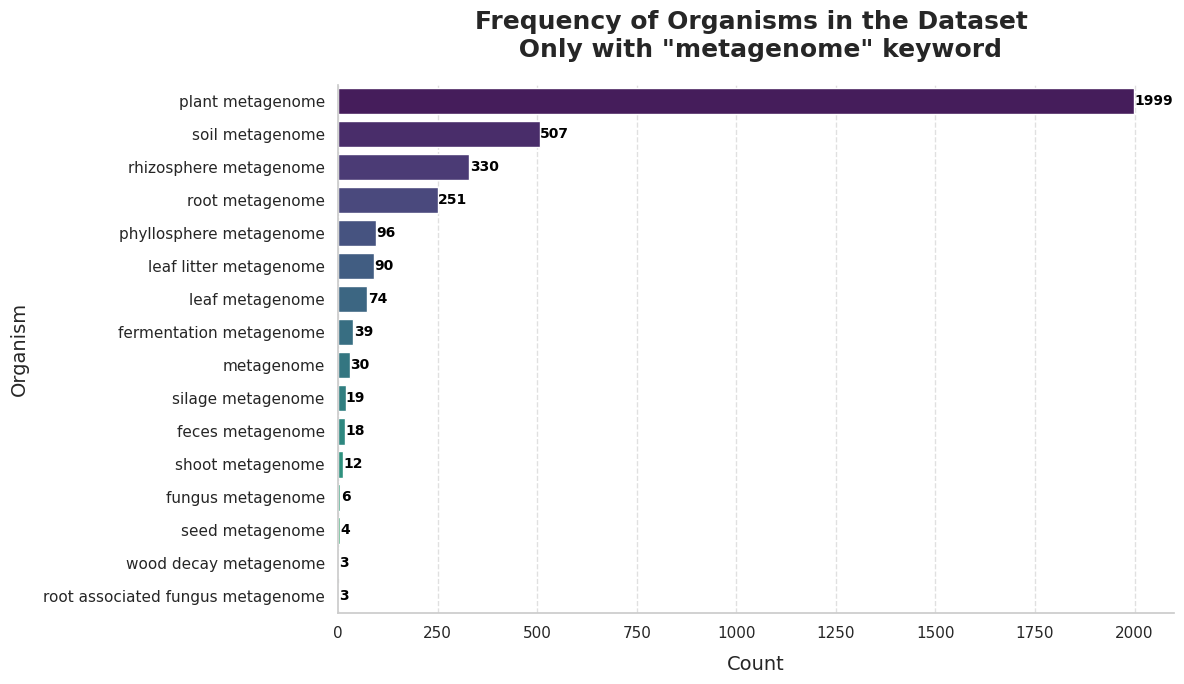

In [8]:
# Now, remove the Organisms different of the 'CITRUS' (or other keyword)
filtered_df = df[df['Organism'].str.contains(organism_keyword, case=False, na=False, regex=True)]

# Set style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))

# Order top 20 organisms
top_organisms = filtered_df['Organism'].value_counts().index[:20]

# Count plot with gradient palette
ax = sns.countplot(
    data=filtered_df, 
    y='Organism', 
    order=top_organisms, 
    palette=sns.color_palette("viridis", n_colors=20)
)

# Add value labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2, 
            f'{int(width)}', 
            va='center', fontsize=10, fontweight='bold', color='black')

# Titles and labels
plt.title('Frequency of Organisms in the Dataset \n Only with "metagenome" keyword', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Count', fontsize=14, labelpad=10)
plt.ylabel('Organism', fontsize=14, labelpad=10)

# Style ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Grid only on x-axis
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Remove top and right spines for a cleaner look
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

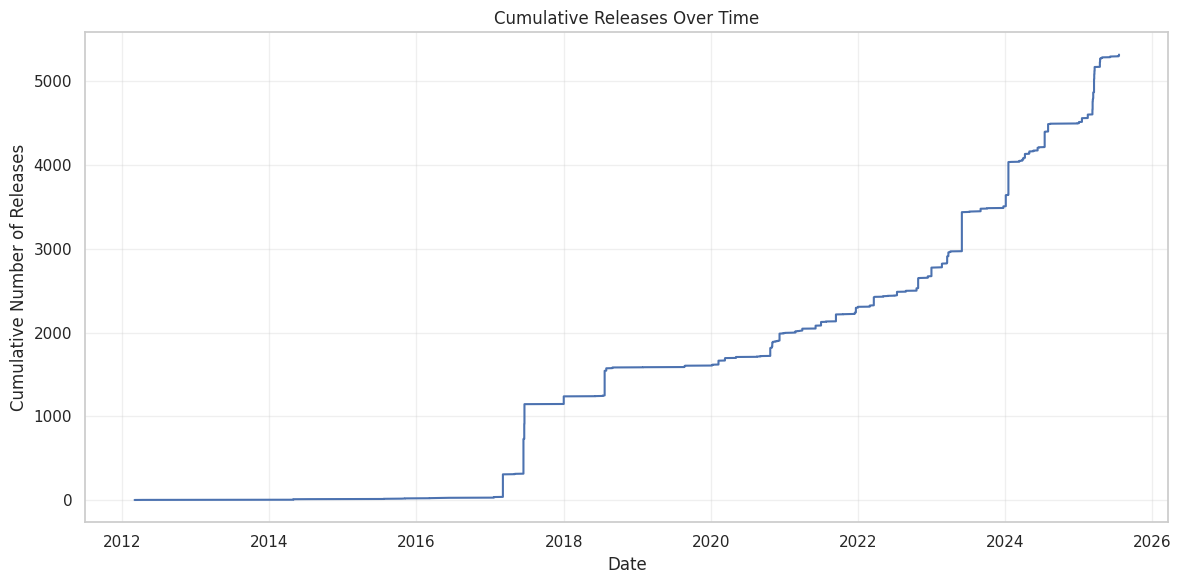

In [9]:
# Release data time series
# Convert and sort by date
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df_sorted = df.sort_values('ReleaseDate')

# Create cumulative count
df_sorted['Cumulative_Releases'] = range(1, len(df_sorted) + 1)

plt.figure(figsize=(12, 6))
plt.plot(df_sorted['ReleaseDate'], df_sorted['Cumulative_Releases'])
plt.title('Cumulative Releases Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Number of Releases')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipykernel_16949/1722362917.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['YearMonth'] = df['ReleaseDate'].dt.to_period('M')


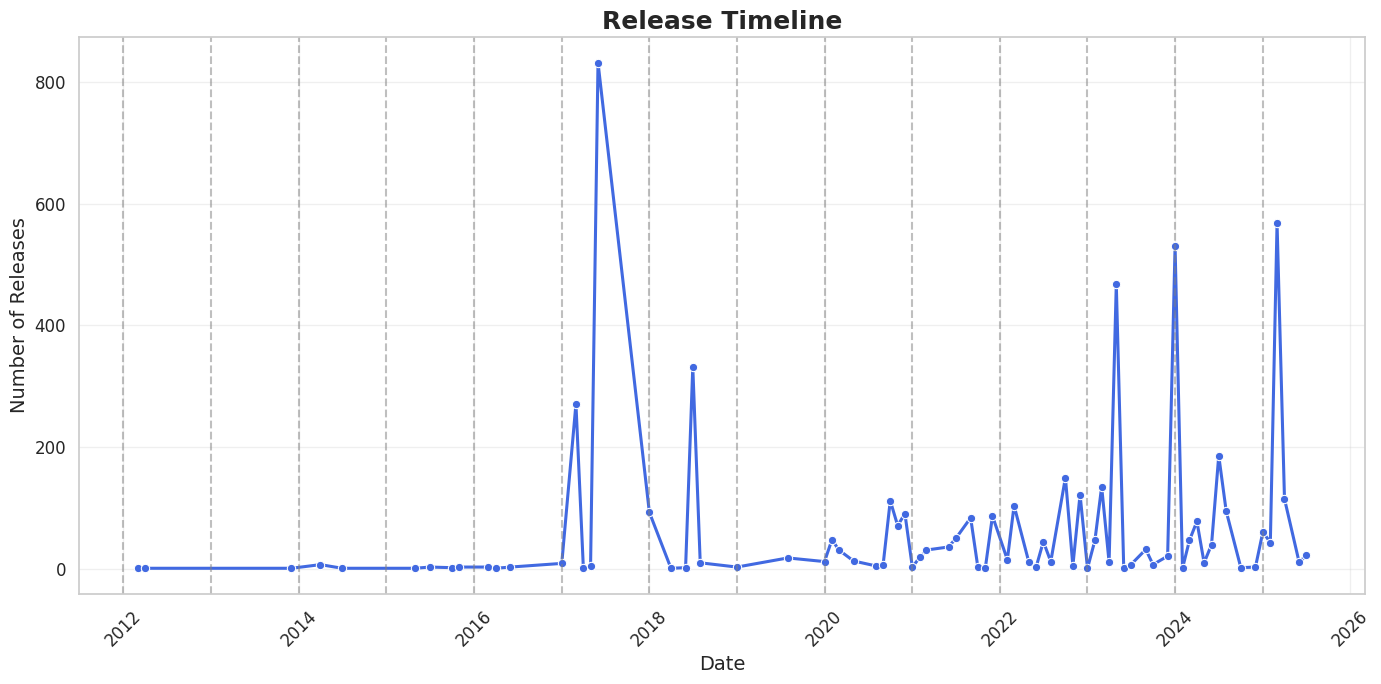

In [10]:
# Convert to datetime and extract month-year
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df['YearMonth'] = df['ReleaseDate'].dt.to_period('M')

# Count by month
monthly_data = df.groupby('YearMonth').size().reset_index(name='Count')
monthly_data['YearMonth'] = monthly_data['YearMonth'].dt.to_timestamp()

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_data, 
    x='YearMonth', 
    y='Count', 
    marker='o', 
    linewidth=2.2, 
    color='royalblue'
)

# Add vertical dotted lines at the start of each year
years = monthly_data['YearMonth'].dt.year.unique()
for year in years:
    plt.axvline(
        pd.Timestamp(f'{year}-01-01'), 
        color='gray', 
        linestyle='--', 
        alpha=0.5
    )

# Beautify
plt.title('Release Timeline', fontsize=18, weight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Releases', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

/tmp/ipykernel_16949/2727221788.py:13: UserWarning: The palette list has more values (20) than needed (16), which may not be intended.
  ax = sns.countplot(data=df, y='tissue', order=top_tissues, palette=sns.color_palette("viridis", n_colors=20))


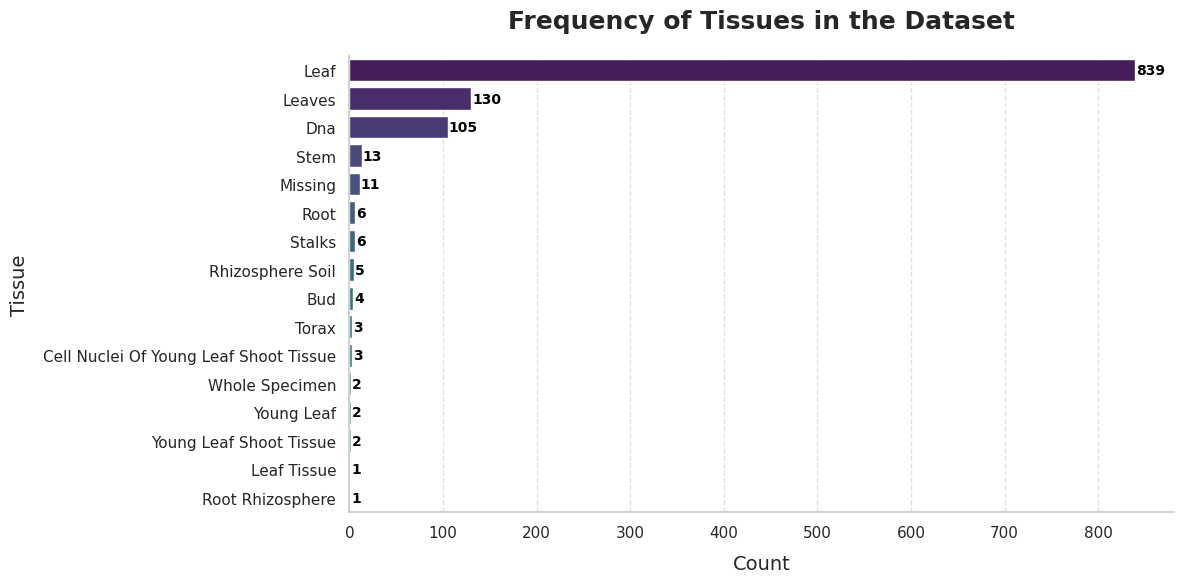

In [11]:

# Tissue Frequency - Only the 20 Most Abundant
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

# Normalize the 'tissue' column by stripping whitespace and converting to lowercase
df['tissue'] = df['tissue'].str.strip().str.lower()
df['tissue'] = df['tissue'].str.title()

top_tissues = df['tissue'].value_counts().index[:20]

# Count plot for tissue frequency
ax = sns.countplot(data=df, y='tissue', order=top_tissues, palette=sns.color_palette("viridis", n_colors=20))

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2, 
            f'{int(width)}', 
            va='center', fontsize=10, fontweight='bold', color='black')

# Titles and labels
plt.title('Frequency of Tissues in the Dataset', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Count', fontsize=14, labelpad=10)
plt.ylabel('Tissue', fontsize=14, labelpad=10)

# Style ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add grid only on x-axis
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Remove top and right spines for a cleaner look
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

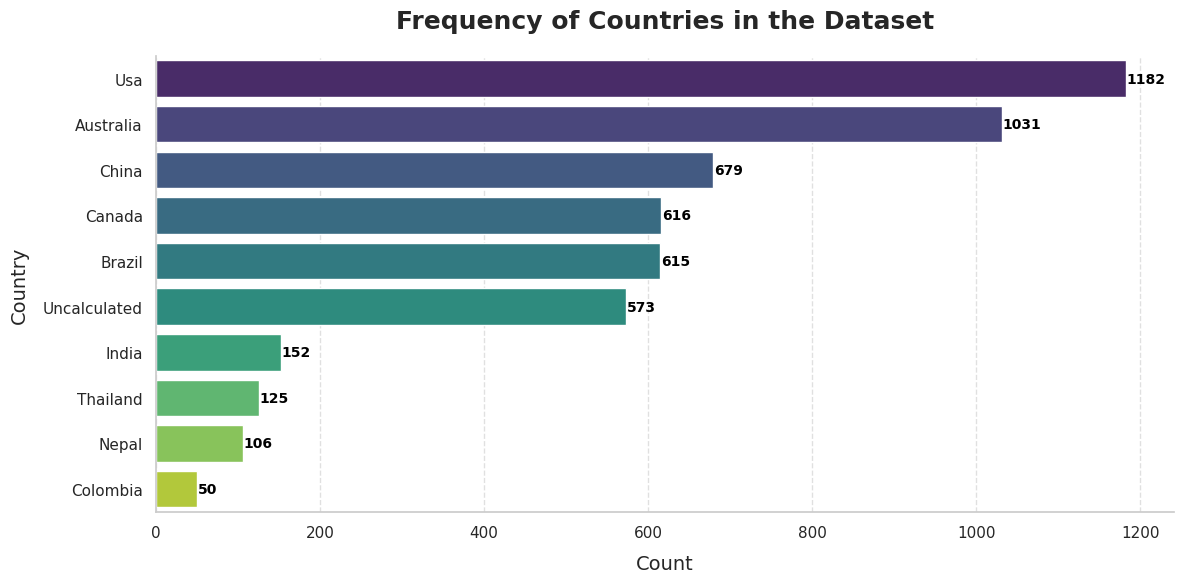

In [12]:
# Country Name Frequency - Only the 10 Most Abundant
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

# Normalize the 'geo_loc_name_country' column by stripping whitespace and converting to lowercase
df['geo_loc_name_country'] = df['geo_loc_name_country'].str.strip().str.lower()
df['geo_loc_name_country'] = df['geo_loc_name_country'].str.title()

most_abundant_countries = df['geo_loc_name_country'].value_counts().index[:10]

# Count plot for country frequency
ax = sns.countplot(data=df, y='geo_loc_name_country', order=most_abundant_countries, palette=sns.color_palette("viridis", n_colors=10))

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2,
            f'{int(width)}',
            va='center', fontsize=10, fontweight='bold', color='black')

# Titles and labels
plt.title('Frequency of Countries in the Dataset', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Count', fontsize=14, labelpad=10)
plt.ylabel('Country', fontsize=14, labelpad=10)

# Style ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add grid only on x-axis
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Remove the top and right spines for a cleaner look
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

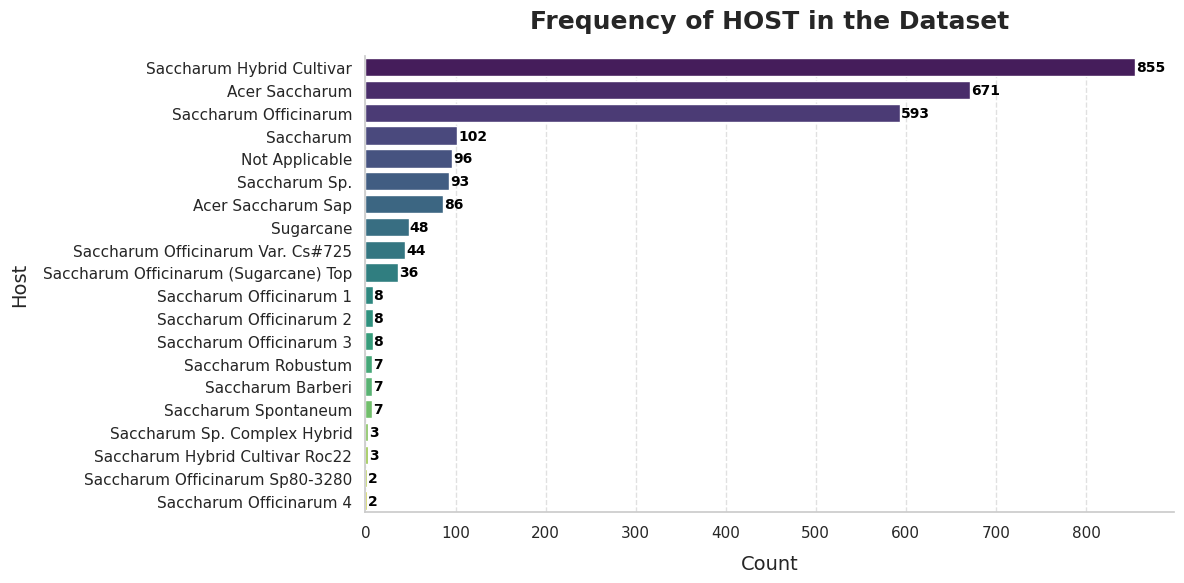

In [13]:
# HOST Name Frequency - Only the 20 Most Abundant
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

# Normalize the 'HOST' column by stripping whitespace and converting to uppercase
df['HOST'] = df['HOST'].str.strip().str.upper()
# Maing only the first word uppercase
df['HOST'] = df['HOST'].str.title()

# For CITRUS use 20
max_values = 20
# max_values = 3

most_abundant_host = df['HOST'].value_counts().index[:max_values]

# Count plot for host frequency
ax = sns.countplot(data=df, y='HOST', order=most_abundant_host, palette=sns.color_palette("viridis", n_colors=max_values))

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2,
            f'{int(width)}',
            va='center', fontsize=10, fontweight='bold', color='black')

# Titles and labels
plt.title('Frequency of HOST in the Dataset', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Count', fontsize=14, labelpad=10)
plt.ylabel('Host', fontsize=14, labelpad=10)

# Style ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add grid only on x-axis
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Remove the top and right spines for a cleaner look
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()


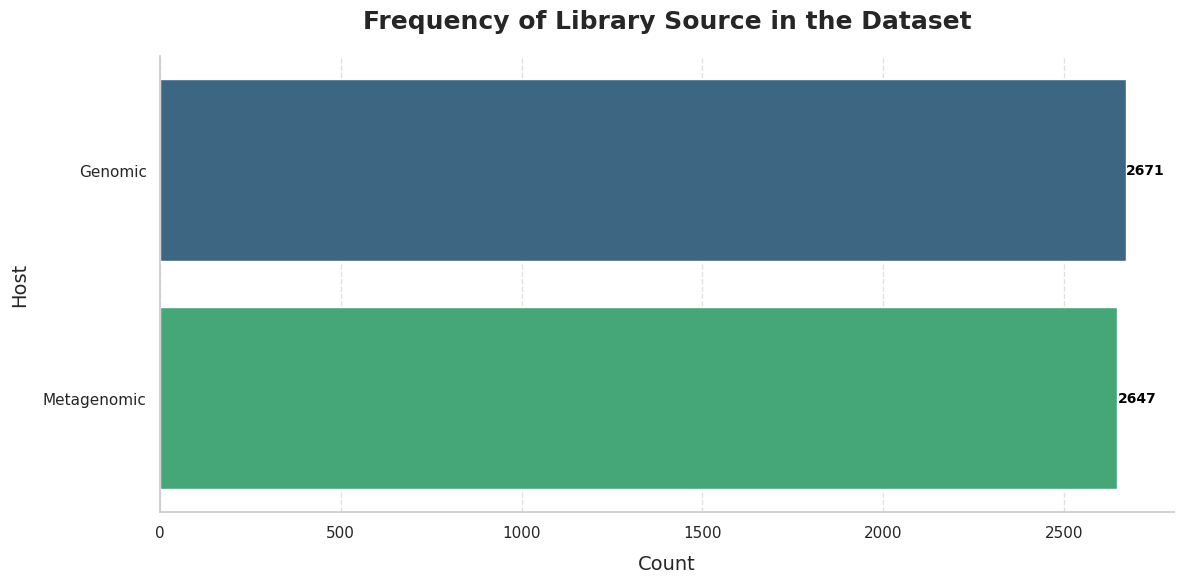

In [14]:
# HOST Name Frequency - Only the 20 Most Abundant
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

# Normalize the 'LibrarySource' column by stripping whitespace and converting to uppercase
df['LibrarySource'] = df['LibrarySource'].str.strip().str.upper()
# Making only the first word uppercase
df['LibrarySource'] = df['LibrarySource'].str.title()

# For CITRUS use 20
max_values = 2
# max_values = 3

most_abundant_host = df['LibrarySource'].value_counts().index[:max_values]

# Count plot for host frequency
ax = sns.countplot(data=df, y='LibrarySource', order=most_abundant_host, palette=sns.color_palette("viridis", n_colors=max_values))

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2,
            f'{int(width)}',
            va='center', fontsize=10, fontweight='bold', color='black')

# Titles and labels
plt.title('Frequency of Library Source in the Dataset', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Count', fontsize=14, labelpad=10)
plt.ylabel('Host', fontsize=14, labelpad=10)

# Style ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add grid only on x-axis
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Remove the top and right spines for a cleaner look
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

/tmp/ipykernel_16949/253171421.py:15: UserWarning: The palette list has more values (20) than needed (12), which may not be intended.
  ax = sns.countplot(data=df, y='treatment', order=most_abundant_treatment, palette=sns.color_palette("viridis", n_colors=20))


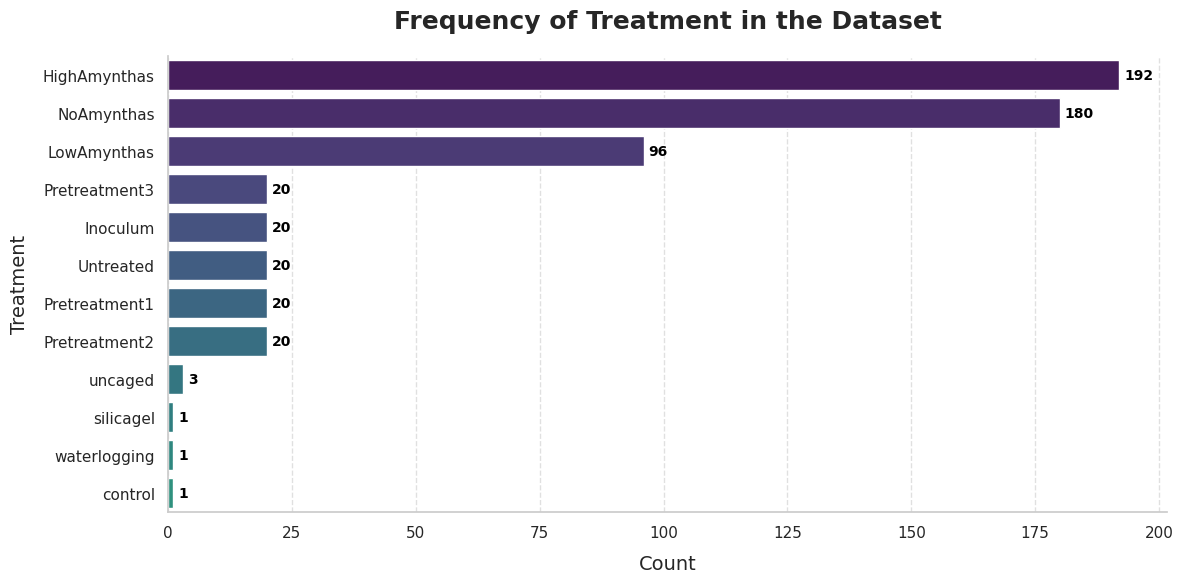

In [15]:
# Treatment
# Treatment Name Frequency - Only the 20 Most Abundant
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

# # Normalize the 'treatment_name' column by stripping whitespace and converting to uppercase
# df['treatment'] = df['treatment'].str.strip().str.upper()
# # Making only the first word uppercase
# df['treatment'] = df['treatment'].str.title()

most_abundant_treatment = df['treatment'].value_counts().index[:20]

# Count plot for treatment frequency
ax = sns.countplot(data=df, y='treatment', order=most_abundant_treatment, palette=sns.color_palette("viridis", n_colors=20))

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2,
            f'{int(width)}',
            va='center', fontsize=10, fontweight='bold', color='black')

# Titles and labels
plt.title('Frequency of Treatment in the Dataset', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Count', fontsize=14, labelpad=10)
plt.ylabel('Treatment', fontsize=14, labelpad=10)

# Style ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add grid only on x-axis
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Remove the top and right spines for a cleaner look
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()
